In [80]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [81]:
newdf = pd.read_csv('newdf3.csv')
newdf.head(5)

,AveMonthSpend,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,89,31,Bachelors,Professional,M,M,1,0,0,2,137947
1,117,32,Bachelors,Professional,M,S,0,1,3,3,101141
2,123,32,Bachelors,Professional,M,M,1,1,3,3,91945
3,50,29,Bachelors,Professional,F,S,0,1,0,0,86688
4,95,29,Bachelors,Professional,F,S,1,4,5,5,92771


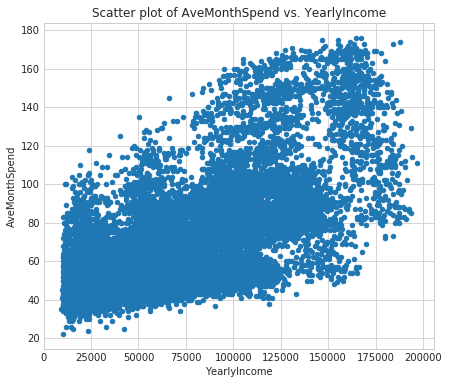

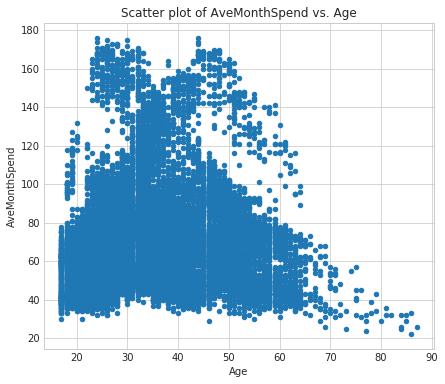

In [82]:
def plot_scatter(newdf, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        newdf.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['YearlyIncome', 'Age']
plot_scatter(newdf, num_cols)        

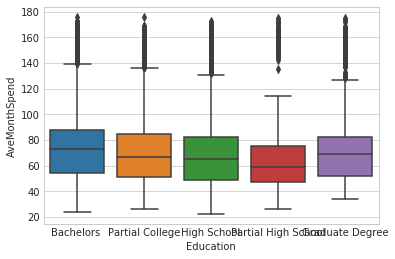

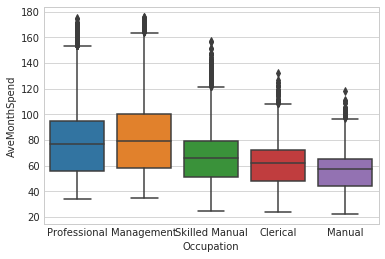

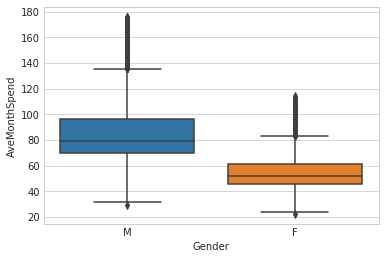

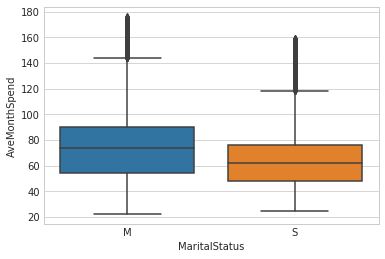

In [83]:
def plot_box(newdf, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=newdf)
        plt.xlabel(col, ) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['Education', 'Occupation', 'Gender', 'MaritalStatus']
plot_box(newdf, cat_cols) 

In [84]:
print(newdf['Occupation'].unique())
Features = newdf['Occupation']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['Professional' 'Management' 'Skilled Manual' 'Clerical' 'Manual']
[3 3 3 ... 0 0 0]


In [85]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [86]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['MaritalStatus', 'Gender', 'Occupation', 'Education']

for col in categorical_columns:
    temp = encode_string(newdf[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])   

(16404, 19)
[[0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]]


In [87]:
Features = np.concatenate([Features, np.array(newdf[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'Age', 'YearlyIncome']])], axis = 1)
Features[:2,:]

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 3.10000e+01, 1.37947e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 3.00000e+00, 3.00000e+00, 3.20000e+01, 1.01141e+05]])

In [88]:
testdf = pd.read_csv('testdf.csv')
testdf.head(5)

,Age,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,52,Bachelors,Management,F,S,0,2,0,5,86931
1,33,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,63,Graduate Degree,Management,F,M,1,2,0,4,103985
3,39,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,32,High School,Manual,F,M,1,1,2,2,21876


In [89]:
print(testdf['Occupation'].unique())
Features2 = testdf['Occupation']
enc = preprocessing.LabelEncoder()
enc.fit(Features2)
Features2 = enc.transform(Features2)
print(Features2)

['Management' 'Skilled Manual' 'Manual' 'Clerical' 'Professional']
[1 4 1 4 2 0 4 3 2 4 3 3 4 3 4 3 4 4 1 0 2 4 3 4 3 1 4 3 3 1 4 1 1 1 3 0 1
 4 3 4 3 2 4 0 4 4 2 4 1 0 1 3 1 2 3 4 3 4 4 0 0 0 3 3 2 4 3 1 0 3 3 1 3 0
 0 3 0 4 3 3 4 4 0 1 0 0 3 1 2 1 1 4 1 4 2 3 2 4 4 3 1 1 4 1 3 3 2 1 3 1 3
 4 3 0 4 3 0 4 4 3 4 3 3 0 4 3 0 4 2 1 4 2 4 3 3 1 3 4 3 3 3 4 1 4 3 3 4 2
 2 4 4 0 0 4 1 0 3 0 3 3 4 4 4 4 3 1 1 3 3 0 0 3 4 1 0 0 1 4 2 3 2 4 3 1 2
 3 4 2 4 0 4 1 3 1 1 4 3 3 1 1 3 4 2 4 3 3 1 3 1 0 4 2 4 4 4 3 4 3 4 0 4 4
 1 4 2 3 3 3 2 4 0 1 4 2 3 2 2 4 3 0 3 3 0 2 3 0 0 0 1 3 3 4 2 1 1 3 4 4 1
 4 0 4 1 4 0 3 4 3 1 3 3 0 1 0 3 0 3 3 2 4 3 3 4 2 2 2 4 0 1 2 0 3 4 3 0 1
 3 2 0 2 3 4 1 4 1 0 3 1 3 1 0 3 3 3 4 4 4 3 3 3 0 2 4 3 1 2 4 3 4 3 1 4 0
 4 3 1 3 4 3 4 3 4 4 3 0 2 3 2 3 1 1 0 1 4 1 1 4 3 2 3 1 3 4 3 0 2 0 3 0 4
 3 0 4 2 3 3 4 0 0 1 4 3 2 1 3 3 1 2 4 4 4 1 0 4 4 4 3 2 2 4 1 3 1 3 4 3 4
 4 4 0 3 0 1 4 0 4 3 1 1 4 1 0 3 2 1 4 0 2 2 2 0 3 3 3 0 0 3 1 4 1 4 1 3 1
 2 3 4 2 0 4 2 4 3 4 1 4 3 4 4 3 

In [90]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features2.reshape(-1,1))
Features2 = encoded.transform(Features2.reshape(-1,1)).toarray()
Features2[:10,:]

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [91]:
for col in categorical_columns:
    temp = encode_string(testdf[col])
    Features2 = np.concatenate([Features2, temp], axis = 1)

print(Features2.shape)
print(Features2[:2, :])   

(500, 19)
[[0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]]


In [92]:
Features2 = np.concatenate([Features2, np.array(testdf[['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'Age', 'YearlyIncome']])], axis = 1)
Features2[:2,:]

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 5.00000e+00, 5.20000e+01, 8.69310e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 2.00000e+00, 4.00000e+00, 3.30000e+01, 1.00125e+05]])

In [93]:
labels = newdf['AveMonthSpend']

In [94]:
X_train = Features
y_train = labels
X_test = Features2

In [95]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
X_train[:5,:]

(16404, 25)


array([[-0.43369689, -0.44564235, -0.38618889,  1.52734788, -0.57143724,
         0.92365607, -0.92365607, -0.98932785,  0.98932785, -0.43369689,
        -0.44564235, -0.38618889,  1.52734788, -0.57143724,  1.56450219,
        -0.45864946, -0.46767739, -0.61022548, -0.30546432,  0.69530633,
        -1.31661475, -0.6545231 , -0.00268156, -0.39556118,  1.50580197],
       [-0.43369689, -0.44564235, -0.38618889,  1.52734788, -0.57143724,
        -1.08265407,  1.08265407, -0.98932785,  0.98932785, -0.43369689,
        -0.44564235, -0.38618889,  1.52734788, -0.57143724,  1.56450219,
        -0.45864946, -0.46767739, -0.61022548, -0.30546432, -1.43821501,
        -0.43872887,  1.32667944,  0.59175452, -0.30660425,  0.57928966],
       [-0.43369689, -0.44564235, -0.38618889,  1.52734788, -0.57143724,
         0.92365607, -0.92365607, -0.98932785,  0.98932785, -0.43369689,
        -0.44564235, -0.38618889,  1.52734788, -0.57143724,  1.56450219,
        -0.45864946, -0.46767739, -0.61022548, -0

In [99]:
lin_mod = linear_model.LinearRegression()
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

72.42620393463304
[ 3.43019249e+11  4.54451607e+11  4.92254361e+11 -6.21445001e+12
 -1.10397608e+13  6.81250062e+11  6.81250062e+11 -6.71545089e+12
 -6.71545089e+12  1.13002002e+12  1.04589528e+12  8.63885795e+11
  8.06375381e+12  1.27780678e+13  1.12577341e+13  9.40084092e+12
  9.52010654e+12  1.10310698e+13  6.93135147e+12 -7.32421875e-03
 -4.20898438e-01  1.63134766e+01  6.20117188e-01 -1.49707031e+00
  8.62036133e+00]


In [104]:
y_score = lin_mod.predict(X_test)
print(y_score[1])

106.67598150126702


In [108]:
df = pd.DataFrame(y_score)

In [112]:
df.to_csv('results.csv', sep = ',')